In [1]:
#= vc(x) = cat(eachslice(x, dims=4)...,dims=2)
vcAAsel = vc(a["AAsel"])
vcAasel = vc(a["Aasel"])
vcaasel = vc(a["aasel"])
plot([vcAAsel[i,1,2500]+vcAasel[i,1,2500]+vcaasel[i,1,2500] for i in 1:500]) =#

In [2]:
include("core.jl")
include("2d.jl")

function old_info_to_new(info_arr)
    keys = [
        "n_gens_burnin", "n_gens", "x_max_burnin", "x_max", "y_max", "x_startfill",
        "y_startfill", "trash1", "trash2", "n_demes_startfill", "k_capacity",
        "r_prolif_rate", "trash3", "n_loci", "n_sel_loci", "mut_rate", "migr_rate",
        "s_sel_coef", "h_domin_coef", "prop_of_del_muts", "old_migr_mode"
    ]
    a = Dict{String,Any}(keys[i] => info_arr[i] for i in 1:length(keys))
    a["n_gens_exp"] = a["n_gens"]-a["n_gens_burnin"]
    pop!(a,"trash1")
    pop!(a,"trash2")
    pop!(a,"trash3")
    return a
end

#= function old_load_re(folder_path,re_name)
    stats = isfile("$folder_path/$re_name.info") ? (deserialize("$folder_path/$re_name.info") |> old_info_to_new) : NaN
    dat = isfile("$folder_path/$re_name.dat") ? deserialize("$folder_path/$re_name.dat") : [NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN]
    return Dict("stats"=>stats,"meanf"=>dat[1],"pops"=>dat[8],"AAsel"=>dat[2],"Aasel"=>dat[3],
    "aasel"=>dat[4],"AAneu"=>dat[5],"Aaneu"=>dat[6],"aaneu"=>dat[7])
end =#

"""
(Obsolete) Loads range expansion data from `folder_path`. You only need to specify the filename (root) `re_name`. Automatically loads batches of data if more than one iterate is found.
"""
function old_load_re(folder_path,re_name)
    stats1 = isfile("$folder_path/$(re_name)_1.info") ? (deserialize("$folder_path/$(re_name)_1.info") |> old_info_to_new) : NaN
    dat1 = isfile("$folder_path/$(re_name)_1.dat") ? deserialize("$folder_path/$(re_name)_1.dat") : [NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN]
    res = Dict("stats"=>stats1,"meanf"=>dat1[1],"pops"=>dat1[8],"AAsel"=>dat1[2],"Aasel"=>dat1[3],
    "aasel"=>dat1[4],"AAneu"=>dat1[5],"Aaneu"=>dat1[6],"aaneu"=>dat1[7])
    i = 2
    while isfile("$folder_path/$(re_name)_$i.dat")
        dat = deserialize("$folder_path/$(re_name)_$i.dat")
        res["meanf"] = cat(res["meanf"],dat[1],dims=4)
        res["pops"] = cat(res["pops"],dat[8],dims=4)
        res["AAsel"] = cat(res["AAsel"],dat[2],dims=4)
        res["Aasel"] = cat(res["Aasel"],dat[3],dims=4)
        res["aasel"] = cat(res["aasel"],dat[4],dims=4)
        res["AAneu"] = cat(res["AAneu"],dat[5],dims=4)
        res["Aaneu"] = cat(res["Aaneu"],dat[6],dims=4)
        res["aaneu"] = cat(res["aaneu"],dat[7],dims=4)
        i += 1
    end
    return res
end

2d.jl successfully loaded.


old_load_re

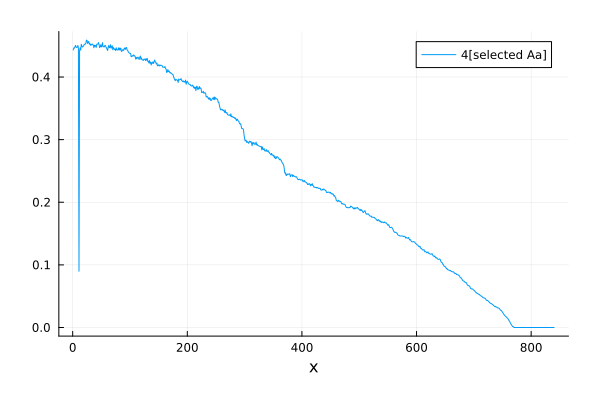

In [3]:
a = old_load_re("D:/Coding/range-exp-simulat/data/2d_axial_real/","ooa_m0")
a["stats"]["name"] = "4"
re_plot_avrelselneu(a,"Aa")

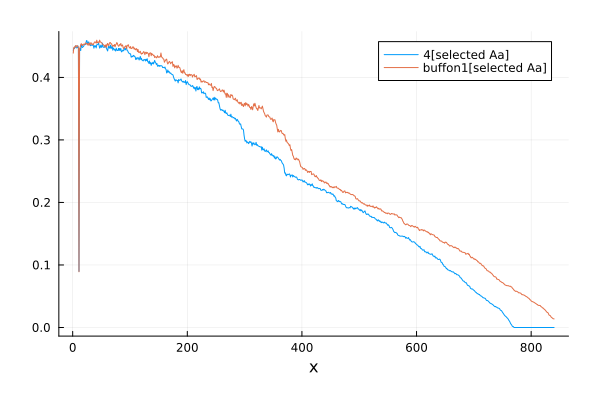

In [4]:
b = old_load_re("D:/Coding/range-exp-simulat/data/2d_axial_real/","ooa_m1")
b["stats"]["name"] = "buffon1"
re_plot_avrelselneu!(b,"Aa")

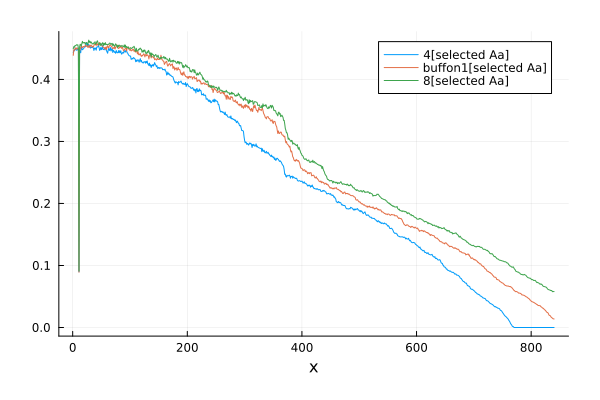

In [5]:
c = old_load_re("D:/Coding/range-exp-simulat/data/2d_axial_real/","ooa_m4")
c["stats"]["name"] = "8"
re_plot_avrelselneu!(c,"Aa")

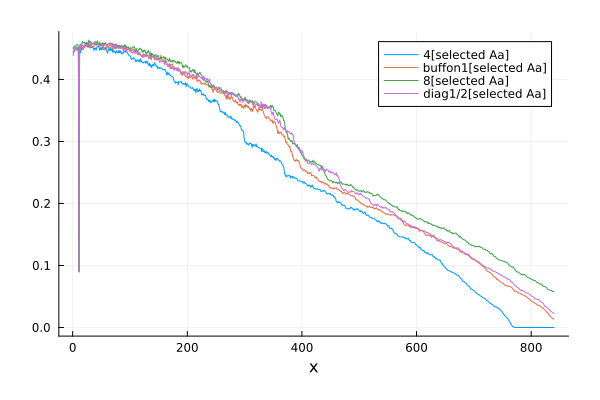

In [6]:
d = old_load_re("D:/Coding/range-exp-simulat/data/2d_axial_real/","ooa_m5")
d["stats"]["name"] = "diag1/2"
re_plot_avrelselneu!(d,"Aa")